<a href="https://colab.research.google.com/github/w2k31984/clasificacion_con_modelos_de_ML/blob/master/clasificacion_validacion_modelos_Clasificaci%C3%B3n_Pacientes_con_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Clasificación de Pacientes con Diabetes

Este cuaderno forma parte de un proyecto práctico de **Data Science** enfocado en la predicción del diagnóstico de diabetes en pacientes mediante algoritmos de **aprendizaje automático (Machine Learning)**.

## 🎯 Objetivo
Desarrollar un modelo de clasificación capaz de predecir si un paciente tiene diabetes (basado en indicadores clínicos como niveles de glucosa, presión arterial, IMC, historial familiar, entre otros).

## 📚 Contenido del Cuaderno

1. **Carga y exploración del dataset**
   - Visualización inicial de los datos
   - Análisis estadístico descriptivo

2. **Preprocesamiento de datos**
   - Manejo de valores faltantes
   - Normalización y transformación de variables

3. **División del conjunto de datos**
   - Entrenamiento y prueba (train/test split)

4. **Evaluación de modelos**
   - Matriz de confusión

## 🌱 Inspirado en el curso:
Este trabajo se realizó como parte del aprendizaje en el curso de **[Clasificación, Validación de Modelos y Métricas de Evaluación](https://app.aluracursos.com/course/clasificacion-validacion-modelos-metricas-evaluacion/task/91023)** de Alura, que profundiza en técnicas esenciales para la construcción y evaluación de modelos de clasificación.

## 🧠 Habilidades aplicadas
- Python (Pandas, Scikit-learn, Matplotlib, Seaborn)
- Ciencia de datos
- Machine Learning
- Toma de decisiones basada en métricas

In [39]:
%pip install imbalanced-learn
print('Pquete instalado con exito!')

Pquete instalado con exito!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importar librerias
import pandas as pd
import plotly.express as px #Para realizar graficos interactivos.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings #Ignorar los warning que se produzcan en el proyecto.
warnings.filterwarnings('ignore')
print('Librerias cargadas con exito!')

Librerias cargadas con exito!


In [3]:
#Cargando nuestro archivo de datos desde drive.
datos = pd.read_csv('/content/drive/MyDrive/Data_Science/Clasificacion_Datos_ML/diabetes.csv')

In [4]:
#Explorando la informacion de nuestro dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


Con la informacion de las variables podemos definir cuales son variables categoricas y contra cual vamos a validar dichas variables que seria X [glicemia, presion_sanguinea,grasa_subcutanea_triceps,insulina,imc] contra y que seria daibetes

In [5]:
datos

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


La clasificación del modelo debe hacerse para la columna de diabetes, que presenta valores de 0 para ausencia de diabetes y 1 para presencia de diabetes, por lo tanto, esta es la variable objetivo y el resto son variables explicativas. Podemos realizar la división de los datos usando el código:

In [6]:
X = datos.drop('diabetes', axis=1)
y = datos['diabetes']


Para realizar la división de datos entre entrenamiento, validación y prueba, podemos usar el método train_test_split de la biblioteca Scikit-Learn

In [7]:
from sklearn.model_selection import train_test_split
print('Libreria cargada con exito!')

Libreria cargada con exito!


In [8]:
#Creando nuestro dataset de entrenamiento y validacion
X,X_test, y,y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5) #stratify misma cantidad de morosos para ambos conjuntos de entrenamiento y validacion
X_train,X_val, y_train,y_val = train_test_split(X, y, stratify=y, random_state=5)

La primera etapa para la creación de los modelos será la importación de los algoritmos **DecisionTreeClassifier** y **RandomForestClassifier**

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print('Librerias cargadas con exito!')

Librerias cargadas con exito!


Instanciar los modelos y almacenarlos en variables, aquí se eligieron los valores de max_depth = 3 para el DecisionTree y max_depth = 2 para el RandomForest

In [10]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [11]:
#Ajustamos nuestro modelo utilizando el metodo fit().
#Y para evaluar la taza de acierto utilizamos el metodo score()
#Para nuestro algoritmo de arbol de decision.
arbol.fit(X_test, y_test)
print(f'Precisión de entrenamiento: {arbol.score(X_test, y_test)}')
print(f'Precisión de prueba: {arbol.score(X_val, y_val)}')

Precisión de entrenamiento: 0.8333333333333334
Precisión de prueba: 0.5833333333333334


**Explicacion:** <br>
En nuestro modelo de Arbol de decision, tenemos para nuestras clases en pruebas **83%** de generalizacion de nuestras clases mientras que en el df de pruebas un **58%** de generalizacion.

In [12]:
#Ajustamos nuestro modelo utilizando el metodo fit().
#Y para evaluar la taza de acierto utilizamos el metodo score()
#Para nuestro algoritmo de Random Forest
random_forest.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {random_forest.score(X_train, y_train)}')
print(f'Precisión de prueba: {random_forest.score(X_val, y_val)}')

Precisión de entrenamiento: 0.78
Precisión de prueba: 0.6666666666666666


En nuestro modelo de Random forest, tenemos para nuestras clases en entrenamiento **78%** de generalizacion de nuestras clases mientras que en el df de pruebas un **66%** de generalizacion.

## Generando la matriz de confusión, primero es necesario importar la función ConfusionMatrixDisplay

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
print('Librerias cargadas con exito!')

Librerias cargadas con exito!


Utilizamos el método predict() para hacer la predicción de datos con los modelos y luego utilizar los valores reales y previstos en el método from_predictions() de la matriz de confusión

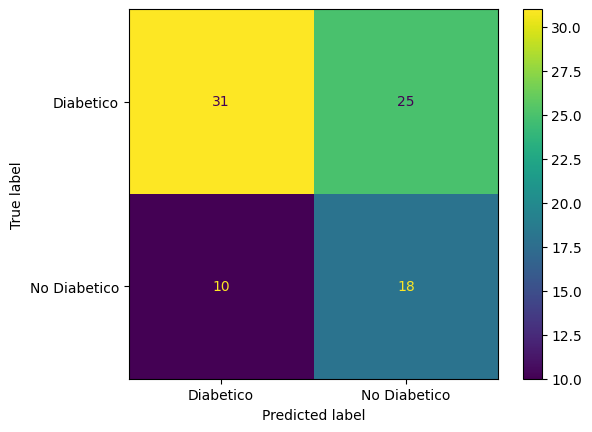

In [14]:
#Matriz de confusion con Arboles de Decision.
prediccion_arbol = arbol.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol,display_labels=['Diabetico', 'No Diabetico']);

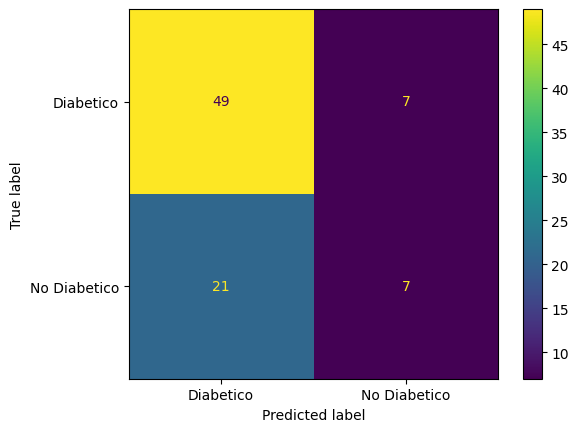

In [15]:
#Matriz de confusion con rf.
prediccion_rf = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf,display_labels=['Diabetico', 'No Diabetico']);

## Evaluación completa de un modelo de clasificación, podemos explorar métricas.<br>
Las metricas evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados.<br>
1- Para extraer las métricas de un modelo, primero importaremos las funciones que calculan automáticamente: <br>
*  accuracy_score
*  recall_score
*  precision_score
*  f1_score

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Librerias cargadas con exito')

Librerias cargadas con exito


2-Calcular cada una de las métricas para los dos modelos, utilizando los datos reales y los valores previstos:

In [17]:
prevision_arbol = arbol.predict(X_val)

print(f'Precisión (Decision Tree): {accuracy_score(y_val, prevision_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prevision_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prevision_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prevision_arbol)}')

Precisión (Decision Tree): 0.5833333333333334
Recall (Decision Tree): 0.6428571428571429
Precisión (Decision Tree): 0.4186046511627907
F1_Score (Decision Tree): 0.5070422535211268


In [18]:
prevision_rf = random_forest.predict(X_val)

print(f'Precisión (Random Forest): {accuracy_score(y_val, prevision_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, prevision_rf)}')
print(f'Precisión (Random Forest): {precision_score(y_val, prevision_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, prevision_rf)}')

Precisión (Random Forest): 0.6666666666666666
Recall (Random Forest): 0.25
Precisión (Random Forest): 0.5
F1_Score (Random Forest): 0.3333333333333333


3 -Para obtener el gráfico de la curva ROC y la métrica AUC, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [19]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
print('Librerias cargadas con exito')

Librerias cargadas con exito


Para presentar los resultados de la curva ROC en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

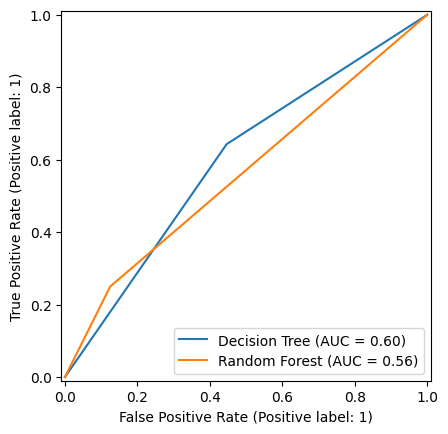

In [20]:
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_roc.ax_)

Ahora solo falta usar el método roc_auc_score para calcular el AUC de los dos modelos:

In [21]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, prevision_arbol)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, prevision_rf)}')

AUC (Decision Tree): 0.5982142857142858
AUC (Random Forest): 0.5625


4 - Para obtener el gráfico de la curva de precisión x recall y la métrica AP, primero importaremos las funciones para generar el gráfico y calcular la métrica:

In [22]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
print('Librerias cargadas con exito')

Librerias cargadas con exito


Para presentar los resultados de la curva de precisión x recall en el mismo gráfico, podemos almacenar el gráfico en una variable y utilizar el parámetro ax para usar el gráfico ya existente como base:

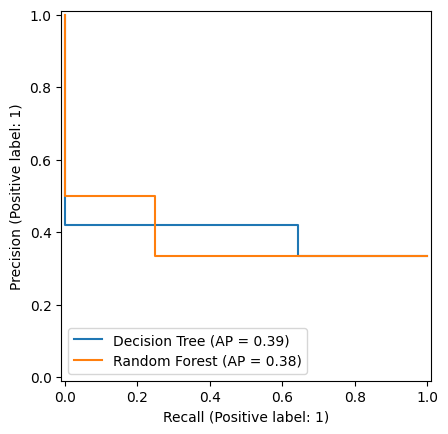

In [23]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_precision_recall.ax_)

Utilizamos el método average_precision_score para calcular el AP de los dos modelos:

In [24]:
print(f'AP (Decision Tree): {average_precision_score(y_val, prevision_arbol)}')
print(f'AP (Random Forest): {average_precision_score(y_val, prevision_rf)}')

AP (Decision Tree): 0.38815060908084165
AP (Random Forest): 0.375


5 - Para generar el informe de métricas, primero necesitamos importar la función classification_report:

In [25]:
from sklearn.metrics import classification_report
print('Libreria cargada con exito')

Libreria cargada con exito


A partir de aqui, podemos generar los informes para cada uno de los modelos, utilizando los valores reales y previstos:

In [26]:
print('Decision Tree')
print(classification_report(y_val, prevision_arbol))
print('Random Forest')
print(classification_report(y_val, prevision_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        56
           1       0.42      0.64      0.51        28

    accuracy                           0.58        84
   macro avg       0.59      0.60      0.57        84
weighted avg       0.64      0.58      0.60        84

Random Forest
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        56
           1       0.50      0.25      0.33        28

    accuracy                           0.67        84
   macro avg       0.60      0.56      0.56        84
weighted avg       0.63      0.67      0.63        84



Explicacion del reporte para ambos modelos: <br>
**Conclusión Árbol de Decisión:**<br>
* Buena detección de clase 1 (recall alto), pero con muchas predicciones erróneas (baja precisión).
* Débil en clase 0: no recuerda bien los casos reales de clase 0 (recall bajo).
* F1-score balanceado: 0.64 (clase 0) y 0.51 (clase 1), lo que indica un desempeño modesto en ambas clases.
* Macro avg F1 = 0.57: refleja un rendimiento subóptimo promediado sin sesgo por clase.
<br>
<br>

**Conclusión Random Forest:**
* Muy conservador con clase 1: casi siempre predice "0", lo que infla el accuracy.
* Excelente recall en clase 0, pero pésimo recall en clase 1.
Aunque el accuracy es más alto (65%), el modelo falla gravemente en detectar la clase minoritaria.
* Macro avg F1 = 0.50: peor que el árbol → rendimiento promedio más bajo cuando se penaliza el desequilibrio.

 Comparativa: Decision Tree vs Random Forest

In [27]:
import pandas as pd

# Cargando el archivo de datos desde drive.
df_comparativa = pd.read_csv('/content/drive/MyDrive/Data_Science/Clasificacion_Datos_ML/tabla_comparativa.csv')

# Mostrando las primeras filas del DataFrame
display(df_comparativa.head())

,Métrica,Decision Tree,Random Forest,¿Quién gana?
0,Accuracy,58%,65%,✅ RF (pero engañoso)
1,Recall (clase 1),64%,14%,✅ DT
2,Precision (clase 1),42%,44%,✅ RF (ligero)
3,F1 clase 1,0.51,0.22,✅ DT
4,Recall clase 0,55%,91%,✅ RF


1-Proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación.

In [28]:
def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_estandar = resultados.std()
    return f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]'

2- El primer paso a realizar es importar la función cross_val_score y el método KFold:

In [29]:
from sklearn.model_selection import cross_val_score, KFold
print('Libreria cargada con exito')

Libreria cargada con exito


3- Utilizamos el método cross_val_score para realizar el procedimiento de validación cruzada con los dos modelos y generar el intervalo de confianza a partir de los resultados:

In [30]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = kf)
resultado_rf = cross_val_score(random_forest, X, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

'Intervalo de confianza (Random Forest): [0.5051227998841282, 0.8415795174064246]'

3- El primer paso a realizar es importar la función cross_val_score y el método StratifiedKFold:

In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
print('Libreria cargada con exito')

Libreria cargada con exito


Con el método StratifiedKFold. Además, la métrica de evaluación necesita ser alterada a f1, a partir del parámetro scoring de la función cross_val_score:

In [53]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, X, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, X, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

'Intervalo de confianza (Random Forest): [0.025137780188113634, 0.6702130025001304]'

4 - El primer paso a realizar es importar la función cross_val_score y el método LeaveOneOut:

In [33]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
print('Libreria cargada con exito')

Libreria cargada con exito


5-Calcular solo la media de los resultados, por lo tanto, utilizaremos el método mean() en cada una de las listas de resultados para obtener la precisión media.

In [34]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, X, y, cv = loo)
resultado_rf = cross_val_score(random_forest, X, y, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}')

Precisión media (Decision Tree): 0.6916167664670658
Precisión media (Random Forest):0.6826347305389222


Proporcion del set de datos

In [35]:
datos['diabetes'].value_counts(normalize=True)

,proportion
diabetes,
0,0.670051
1,0.329949


## Aplicando otros metodos de balanceo de nuestro modelo.

 importamos el método SMOTEENN desde la sección combine de la biblioteca imblearn

In [45]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.combine import SMOTEENN
print('Librerias cargadas con exito')

Librerias cargadas con exito


Para utilizar el método con la validación cruzada son los mismos. Debemos instanciar el modelo y crear un pipeline con los pasos de balanceo de los datos y ajuste del modelo

In [46]:

modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

Podemos utilizar la validación cruzada con el StratifiedKFold para mantener la proporción en los datos y utilizar el método cross_validate con el pipeline, evaluando el rendimiento con la métrica recall y generando el intervalo de confianza de esa métrica

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
print('Librerias cargadas con exito!')

Librerias cargadas con exito!


In [67]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')

In [68]:
intervalo_conf(cv_resultados['test_score'], 'Pipeline')

'Intervalo de confianza (Pipeline): [0.3572236346471395, 0.8791400017164968]'

El recall de este modelo estuvo alrededor de 0.35 a 0.87%, un poco mejor que el resultado usando solamente el oversampling, pero peor que el resultado del undersampling. Por lo tanto, esta estrategia no fue tan eficiente para este caso, pero eso no significa que no pueda ser utilizada en otros proyectos.

## Analisis grafico de nuestro modelo.

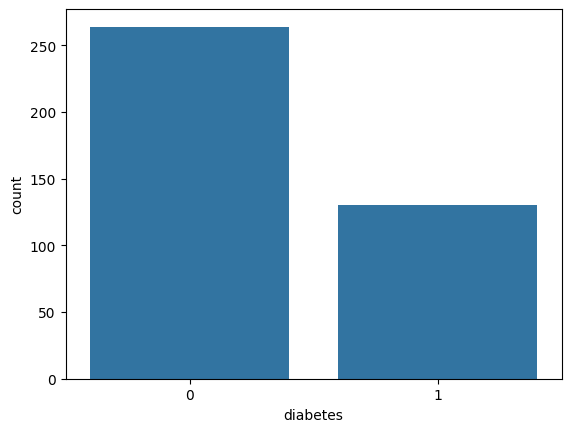

In [69]:
import seaborn as sns

sns.countplot(datos, x = 'diabetes');

In [74]:
#Importando nuestras librerias.
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

Podemos inicializar el modelo, crear el pipeline con las tareas de oversampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [72]:
#Creando nuestro modelo de Arbol de decision.
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.618775172566825


In [73]:
#Creando nuestro modelo de Random Forest
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6322175505653767


 El primer paso es importar el método Pipeline y el NearMiss para balancear los datos:

In [75]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

Hecho esto, podemos inicializar el modelo, crear el pipeline con las tareas de undersampling y del modelo, y realizar la validación cruzada con el StratifiedKfold, obteniendo la media de la métrica F1-Score:

In [76]:
#Con nuestro modelo de arbol de decision
arbol = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', arbol)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arbol = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arbol.mean()}')

F1 (Decision Tree):0.5457415289469261


In [77]:
#Con nuestro modelo de random forest
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, X, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6328349798349798


El modelo que obtuvo mayor rendimiento en las pruebas del desafío fue el RandomForest, usando el max_depth = 2 en la estrategia de undersampling. Por lo tanto, vamos a balancear los datos y utilizar este modelo en todos los datos balanceados. Por último, vamos a validar el modelo en datos de prueba, no vistos hasta ahora

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        40
           1       0.50      0.65      0.57        20

    accuracy                           0.67        60
   macro avg       0.65      0.66      0.65        60
weighted avg       0.70      0.67      0.67        60



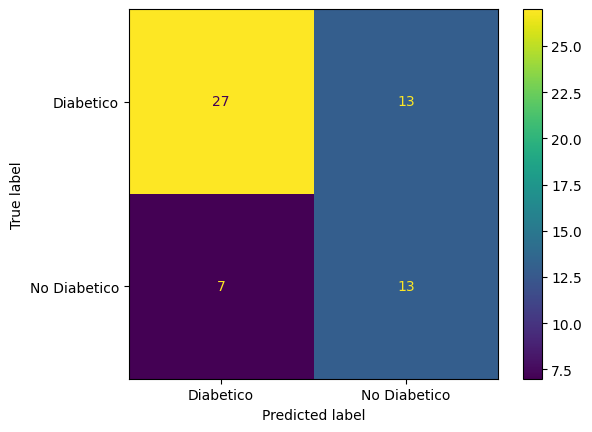

In [82]:
#Validando nuestro modelo.
undersample = NearMiss(version = 3)
X_balanceado, y_balanceado = undersample.fit_resample(X, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(X_balanceado, y_balanceado)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto, display_labels=['Diabetico', 'No Diabetico']);

## Análisis de los Resultados de nuestro Modelo<br>
Vamos a analizar detalladamente los resultados de nuestra evaluación:<br>

Métricas por Clase <br>
Clase 0:

* Precisión: 0.79 → De todos los que el modelo predijo como clase 0, el 79% realmente eran clase 0.

* Recall: 0.65 → El modelo identificó correctamente el 65% de los casos reales de clase 0.

* F1-score: 0.71 → Media armónica entre precisión y recall.

Clase 1:

* Precisión: 0.48 → De todos los que el modelo predijo como clase 1, solo el 48% realmente eran clase 1.

* Recall: 0.65 → El modelo identificó correctamente el 65% de los casos reales de clase 1.

* F1-score: 0.55 → Indica un desempeño más bajo que para la clase 0.

Métricas Globales
* Accuracy: 0.65 → El modelo acierta en el 65% de los casos totales

* Macro avg: 0.63 → Promedio simple de las métricas sin considerar desbalance.

* Weighted avg: 0.66 → Promedio ponderado por el número de muestras en cada clase.

Observaciones Clave
* Desbalance de clases: Hay el doble de muestras de clase 0 (40) que de clase 1 (20).

* Precisión desigual: El modelo es mucho más preciso para la clase 0 que para la clase 1.

* Recall similar: Ambas clases tienen el mismo recall (0.65), lo que indica que el modelo tiene similar capacidad para detectar casos positivos en ambas clases.

**Problema con falsos positivos:<br>**
La baja precisión en clase 1 sugiere muchos falsos positivos (predice clase 1 cuando en realidad es clase 0).

**Recomendaciones <br>**
Mejorar precisión de clase 1:

Revisar características/factores que distinguen clase 1.

* Considerar técnicas de balanceo (oversampling de clase 1 o undersampling de clase 0).

Evaluar costos de errores:

* Dependiendo de tu aplicación, podrías priorizar recall o precisión para una clase específica.

Explorar otros modelos:<br>

* Probar algoritmos que manejen mejor datos desbalanceados.

* Ajustar umbrales de clasificación si es posible.